In [ ]:
 d# Abigail Kelly
# Assignment 2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
def calculate_L2_norm(array_numerical, array_analytical):
    # Extract the last column of the numerical and analytical arrays
    u_numerical = array_numerical[:, -1]
    u_analytical = array_analytical[:, -1]

    # Calculate the difference between numerical and analytical solutions
    diff = u_numerical - u_analytical

    # Calculate the L2 norm
    l2_norm = np.linalg.norm(diff) / np.sqrt(len(diff))

    return l2_norm

def calculate_infinity_norm(array_numerical, array_analytical):
    # Extract the last column of the numerical and analytical arrays
    u_numerical = array_numerical[:, -1]
    u_analytical = array_analytical[:, -1]

    # Calculate the difference between numerical and analytical solutions
    diff = u_numerical - u_analytical

    # Calculate the infinity norm
    infinity_norm = np.linalg.norm(diff, ord=np.inf)

    return infinity_norm

In [ ]:
def q1_analytical(max_x, dx, max_t, dt):
  M = int(max_x / dx) + 1
  N = int(max_t / dt) + 1
  r = dt / dx**2
  k = 1
  analytical = np.zeros((M,N))

  for i in range(M):
      x = i * dx
      for j in range(N):
          t = j * dt
          p1 = 0
          p2 = 0
          for n in range(1, 15):
              p1 += ((2 / (n * np.pi)**3) + (1 / (n * np.pi))) * (((-1)**n) - 1) * np.e**(-k * ((n * np.pi)**2) * t) * np.sin(n * np.pi * x)
              p2 += ((((-1)**n) - 1) / (n* np.pi)) * np.e**(-k * ((n * np.pi)**2) * t) * np.sin(n * np.pi * x)
          analytical[i][j] = 2 - 2 * p1 + 4 * p2

  return analytical


def q1_euler(max_x, dx, max_t, dt):
  M = int(max_x / dx) + 1
  N = int(max_t / dt) + 1
  r = dt / dx**2
  u = np.zeros((M,N))

  u[0, :] = 2  # Boundary condition at x=0
  u[-1, :] = 2  # Boundary condition at x=L

  # Initial condition
  x_count = 0
  for i in range(M):
      x_count = i * dx
      u[i, 0] = -1 * (x_count**2 - x_count - 1)

  # Constructing the matrix A for the linear system
  A = np.zeros((M-2, M-2))
  np.fill_diagonal(A, 1 + 2*r)
  np.fill_diagonal(A[1:], -r)
  np.fill_diagonal(A[:, 1:], -r)

  b = np.zeros(M-2)

  # Iterating over time steps
  for j in range(0, N-1):
      b = u[1:-1, j].copy()
      b[0] += r * u[0, j+1]
      b[-1] += r * u[-1, j+1]
      u[1:-1, j+1] = np.linalg.solve(A, b)

  return u

def q1_crank(max_x, dx, max_t, dt):
  M = int(max_x / dx)
  N = int(max_t / dt)
  C = np.zeros((M+1, N+1))
  r = dt / dx**2

  x = np.linspace(0, max_x, M+1)
  t = np.linspace(0, max_t, N+1)

  A = np.diag((2 + 2 * r) * np.ones(M - 1)) + np.diag((-r) * np.ones(M - 2), 1) + np.diag((-r) * np.ones(M - 2), -1)
  B = np.diag((2 - 2 * r) * np.ones(M - 1)) + np.diag((r) * np.ones(M - 2), 1) + np.diag((r) * np.ones(M - 2), -1)

  C[0, :] = 2  # Boundary condition at x=0
  C[-1, :] = 2  # Boundary condition at x=L

  # Initial condition
  for i in range(1,M):
      x_val = i * dx
      C[i, 0] = -(x_val**2 - x_val - 1)

  for j in range(N):
      b = np.dot(B, C[1:M, j])
      b[0] += r * (C[0, j] + C[0, j+1])
      b[-1] += r * (C[-1, j] + C[-1, j+1])
      C[1:M, j+1] = np.linalg.solve(A, b)
      C[0,j+1], C[-1,j+1] = 2, 2

  return C


In [ ]:
# Question 1a: Construct error tables with tao = 0.1, 0.01 and h = 0.1, 0.05, 0.025
tao = np.array([0.1, 0.01])
h = np.array([0.1, 0.05, 0.025])
max_t = 1
max_x = 1
k = 1
euler_L2_norms = []
crank_L2_norms = []
euler_inf_norms = []
crank_inf_norms = []

for dt in tao:
    for dx in h:
        analytical = q1_analytical(max_x, dx, max_t, dt)
        euler = q1_euler(max_x, dx, max_t, dt)
        crank = q1_crank(max_x, dx, max_t, dt)

        ###################### Errors at t = 1 #########################
        L2_norm_crank = calculate_L2_norm(crank, analytical)
        L2_norm_euler = calculate_L2_norm(euler, analytical)
        euler_L2_norms.append(L2_norm_euler)
        crank_L2_norms.append(L2_norm_crank)

        L_inf_norm_crank = calculate_infinity_norm(crank, analytical)
        L_inf_norm_euler = calculate_infinity_norm(euler, analytical)
        euler_inf_norms.append(L_inf_norm_euler)
        crank_inf_norms.append(L_inf_norm_crank)

print(f'                               L 2 Errors')
print(f'                               tau = 0.1                           tau = 0.01')
print(f'Method                h = 0.1   h = 0.05   h = 0.025       h = 0.1   h = 0.05   h = 0.025')
print(f'-----------------------------------------------------------------------------------------')
print(f'Crank-Nicolson        {crank_L2_norms[0]:.2e}  {crank_L2_norms[1]:.2e}   {crank_L2_norms[2]:.2e}        {crank_L2_norms[3]:.2e}  {crank_L2_norms[4]:.2e}   {crank_L2_norms[5]:.2e}')
print(f'Backward-Difference   {euler_L2_norms[0]:.2e}  {euler_L2_norms[1]:.2e}   {euler_L2_norms[2]:.2e}        {euler_L2_norms[3]:.2e}  {euler_L2_norms[4]:.2e}   {euler_L2_norms[5]:.2e}')
print('\n')
print(f'                             L inf Errors')
print(f'                               tau = 0.1                           tau = 0.01')
print(f'Method                h = 0.1   h = 0.05   h = 0.025       h = 0.1   h = 0.05   h = 0.025')
print(f'-----------------------------------------------------------------------------------------')
print(f'Crank-Nicolson        {crank_inf_norms[0]:.2e}  {crank_inf_norms[1]:.2e}   {crank_inf_norms[2]:.2e}        {crank_inf_norms[3]:.2e}  {crank_inf_norms[4]:.2e}   {crank_inf_norms[5]:.2e}')
print(f'Backward-Difference   {euler_inf_norms[0]:.2e}  {euler_inf_norms[1]:.2e}   {euler_inf_norms[2]:.2e}        {euler_inf_norms[3]:.2e}  {euler_inf_norms[4]:.2e}   {euler_inf_norms[5]:.2e}')

                               L 2 Errors
                               tau = 0.1                           tau = 0.01
Method                h = 0.1   h = 0.05   h = 0.025       h = 0.1   h = 0.05   h = 0.025
-----------------------------------------------------------------------------------------
Crank-Nicolson        2.75e-02  8.87e-02   1.39e-01        2.29e-06  3.54e-07   2.28e-05
Backward-Difference   7.00e-04  7.00e-04   7.04e-04        2.42e-05  2.19e-05   2.15e-05


                             L inf Errors
                               tau = 0.1                           tau = 0.01
Method                h = 0.1   h = 0.05   h = 0.025       h = 0.1   h = 0.05   h = 0.025
-----------------------------------------------------------------------------------------
Crank-Nicolson        5.55e-02  2.78e-01   5.48e-01        3.40e-06  5.13e-07   6.75e-05
Backward-Difference   1.04e-03  1.01e-03   1.01e-03        3.59e-05  3.18e-05   3.08e-05


<Figure size 640x480 with 0 Axes>

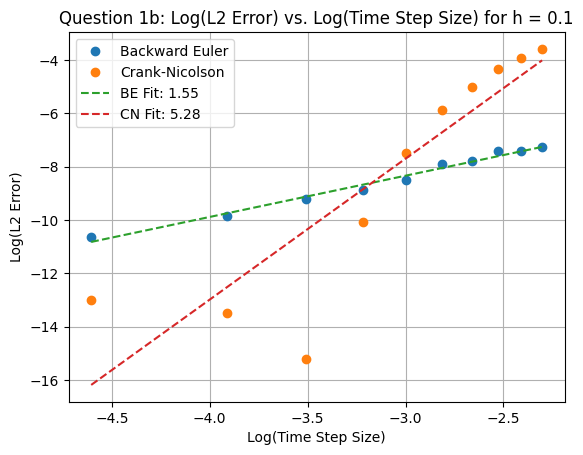

In [ ]:
# Question 1b: Make a loglog plot of the L2 errors with line of best fit
from scipy.stats import linregress
tao = np.arange(0.01, 0.11, 0.01)
dx = 0.1
errors_CN = []
errors_BE = []
k = 1
for dt in tao:
    analytical = q1_analytical(max_x, dx, max_t, dt)
    euler = q1_euler(max_x, dx, max_t, dt)
    crank = q1_crank(max_x, dx, max_t, dt)

    # Calculate L2 error for each method
    error_BE = calculate_L2_norm(euler, analytical)
    error_CN = calculate_L2_norm(crank, analytical)
    errors_BE.append(error_BE)
    errors_CN.append(error_CN)

plt.figure()
log_tao = np.log(tao)
log_errors_BE = np.log(errors_BE)
log_errors_CN = np.log(errors_CN)

plt.figure()
plt.plot(log_tao, log_errors_BE, marker='o', linestyle='', label='Backward Euler')
plt.plot(log_tao, log_errors_CN, marker='o', linestyle='', label='Crank-Nicolson')

# Perform linear regression to find the slope (order of convergence)
slope_BE, intercept_BE, _, _, _ = linregress(log_tao, log_errors_BE)
slope_CN, intercept_CN, _, _, _ = linregress(log_tao, log_errors_CN)

plt.plot(log_tao, intercept_BE + slope_BE * log_tao, '--', label=f'BE Fit: {slope_BE:.2f}')
plt.plot(log_tao, intercept_CN + slope_CN * log_tao, '--', label=f'CN Fit: {slope_CN:.2f}')

plt.xlabel('Log(Time Step Size)')
plt.ylabel('Log(L2 Error)')
plt.title(f'Question 1b: Log(L2 Error) vs. Log(Time Step Size) for h = {dx}')
plt.legend()
plt.grid(True)
plt.show()

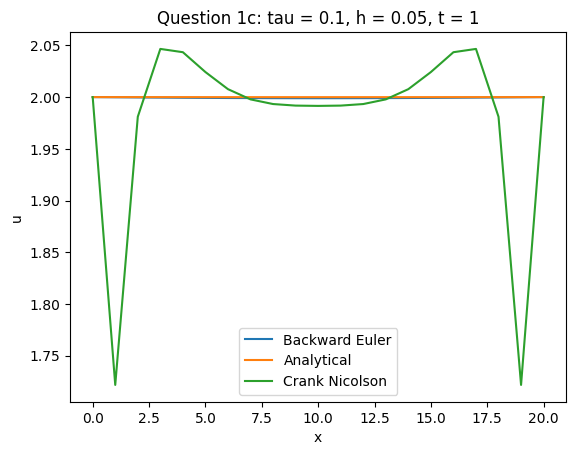

In [ ]:
# Question 1c: Plot numerical and analytical solutions for tao = 0.1, h = 0.05 at t = 1
max_x = 1
dx = 0.05
dt = 0.1
max_t = 1

analytical = q1_analytical(max_x, dx, max_t, dt)
euler = q1_euler(max_x, dx, max_t, dt)
crank = q1_crank(max_x, dx, max_t, dt)

# Plotting
plt.plot(euler[:,-1], label='Backward Euler')
plt.plot(analytical[:,-1], label='Analytical')
plt.plot(crank[:,-1], label='Crank Nicolson')
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.title(f'Question 1c: tau = {dt}, h = {dx}, t = 1')
plt.show()

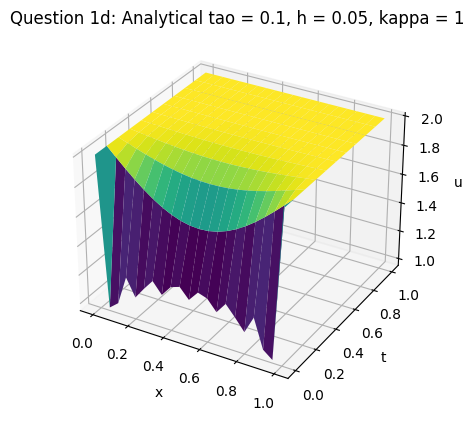

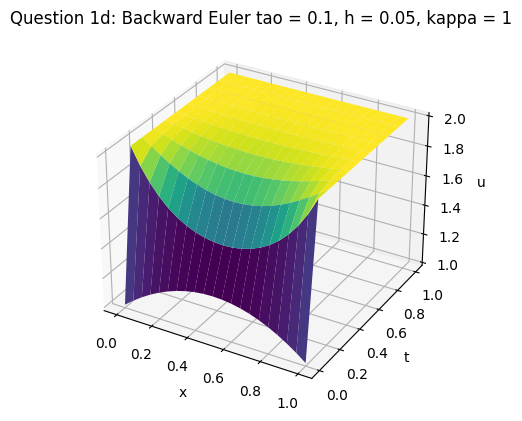

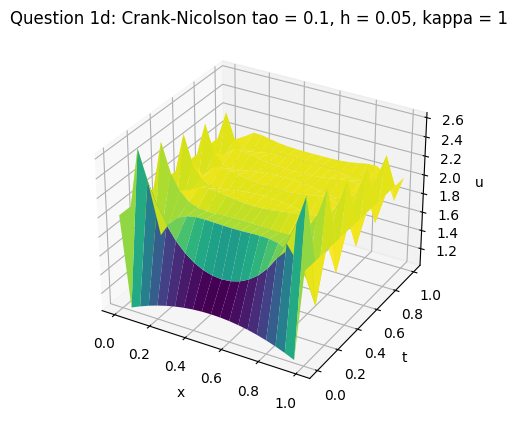

In [ ]:
# Question 1d: Give surface plot of numerical solutions and analytical solution when tao = 0.1, h = 0.05, and k = 1, k = 5
max_x = 1
max_t = 1
dx = 0.05
dt = 0.1
M = int(max_x / dx)
N = int(max_t / dt)

analytical = q1_analytical(max_x, dx, max_t, dt)
euler = q1_euler(max_x, dx, max_t, dt)
crank = q1_crank(max_x, dx, max_t, dt)

# plot analytical
x = np.linspace(0, 1, M+1)
t = np.linspace(0, dt*N, N+1)
X, T = np.meshgrid(x, t)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title(f'Question 1d: Analytical tao = {dt}, h = {dx}, kappa = {k}')
ax.plot_surface(X, T, analytical.T, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
plt.show()

# plot backward euler
x = np.linspace(0, dx*M, M+1)
t = np.linspace(0, dt*N, N+1)
X, T = np.meshgrid(x, t)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title(f'Question 1d: Backward Euler tao = {dt}, h = {dx}, kappa = {k}')
ax.plot_surface(X, T, euler.T, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
plt.show()

# plot crank nicolson
X, T = np.meshgrid(x, t)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title(f'Question 1d: Crank-Nicolson tao = {dt}, h = {dx}, kappa = {k}')
ax.plot_surface(X, T, crank.T, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
plt.show()

In [ ]:
# Question 1e
tau = np.array([1/20, 1/40, 1/80, 1/160, 1/320])
h = np.array([1/40, 1/80, 1/160, 1/320, 1/640])
max_x = 1
max_t = 1
k = 1
errors_CN = []
errors_BE = []
analytical_values = []
euler_values = []
crank_values = []

for i in range(len(tau)):
    dt = tau[i]
    dx = h[i]

    analytical = q1_analytical(max_x, dx, max_t, dt)
    euler = q1_euler(max_x, dx, max_t, dt)
    crank = q1_crank(max_x, dx, max_t, dt)

    # Calculate L2 error for each method
    error_BE = calculate_L2_norm(euler, analytical)
    error_CN = calculate_L2_norm(crank, analytical)
    errors_BE.append(error_BE)
    errors_CN.append(error_CN)

ROC_euler = []
ROC_crank = []
for i in range(1, len(errors_BE)):
    ROC_euler.append(np.log2(errors_BE[i-1] / errors_BE[i]))
    ROC_crank.append(np.log2(errors_CN[i-1] / errors_CN[i]))
print(f'h            tau                     Backward-Euler               Crank-Nicolson')
print(f'====================================================================================')
print(f'                                 L2 error        ROC            L2 error       ROC')
print(f'------------------------------------------------------------------------------------')
print(f'{h[0]:.2e}    {tau[0]:.2e}             {errors_BE[0]:.2e}          -            {errors_CN[0]:.2e}          -')
print(f'{h[1]:.2e}    {tau[1]:.2e}             {errors_BE[1]:.2e}      {ROC_euler[0]:.2e}         {errors_CN[1]:.2e}      {ROC_crank[0]:.2e}')
print(f'{h[2]:.2e}    {tau[2]:.2e}             {errors_BE[2]:.2e}      {ROC_euler[1]:.2e}         {errors_CN[2]:.2e}      {ROC_crank[1]:.2e}')
print(f'{h[3]:.2e}    {tau[3]:.2e}             {errors_BE[3]:.2e}      {ROC_euler[2]:.2e}         {errors_CN[3]:.2e}      {ROC_crank[2]:.2e}')
print(f'{h[4]:.2e}    {tau[4]:.2e}             {errors_BE[4]:.2e}      {ROC_euler[3]:.2e}         {errors_CN[4]:.2e}      {ROC_crank[3]:.2e}')

h            tau                     Backward-Euler               Crank-Nicolson
                                 L2 error        ROC            L2 error       ROC
------------------------------------------------------------------------------------
2.50e-02    5.00e-02             1.97e-04          -            6.37e-02          -
1.25e-02    2.50e-02             6.85e-05      1.52e+00         4.53e-02      4.90e-01
6.25e-03    1.25e-02             2.80e-05      1.29e+00         3.22e-02      4.95e-01
3.13e-03    6.25e-03             1.26e-05      1.15e+00         2.28e-02      4.98e-01
1.56e-03    3.13e-03             5.97e-06      1.08e+00         1.61e-02      4.99e-01


In [ ]:
def q2_analytical(max_x, dx, max_t, dt):
  M = int(max_x / dx) + 1
  N = int(max_t / dt) + 1
  k = 1
  analytical = np.zeros((M,N))

  for i in range(M):
      x = i * dx
      for j in range(N):
        p1 = 0
        p2 = 0
        p3 = 0
        t = j * dt
        for n in range(1, 15):
            p1 += (((-1)**n - 1) / (n * np.pi)) * (np.sin(n * np.pi * x) / ((n * np.pi)**2 - 1)) * np.e**(-t)
            p2 += ((2 / (n * np.pi)**3) + (1 / (n * np.pi))) * ((-1)**n - 1) * np.e**(-k * (n * np.pi)**2 * t) * np.sin(n * np.pi * x)
            p3 += ((((-1)**n - 1) * ( n * np.pi)) / ((n * np.pi)**2 - 1)) * np.e**(-k * (n * np.pi)**2 * t) * np.sin(n * np.pi * x)
        analytical[i,j] = np.e**(-t) - 2 * p1 - 2 * p2 + 2 * p3

  return analytical

def q2_euler(max_x, dx, max_t, dt):
  M = int(max_x / dx) + 1
  N = int(max_t / dt) + 1
  r = dt / dx**2
  u = np.zeros((M,N))

  # boundary conditions
  for i in range(N):
    t = i * dt
    u[0, i] = np.e**(-t)
    u[-1, i] = np.e**(-t)

  # Initial condition
  for i in range(M):
    x = i * dx
    u[i, 0] = -(x**2 - x - 1)

  # Constructing the matrix A for the linear system
  A = np.zeros((M-2, M-2))
  np.fill_diagonal(A, 1 + 2*r)
  np.fill_diagonal(A[1:], -r)
  np.fill_diagonal(A[:, 1:], -r)

  b = np.zeros(M-2)

  # Iterating over time steps
  for j in range(0, N-1):
    b = u[1:M-1, j].copy()
    b[0] += r * u[0, j+1]
    b[-1] += r * u[-1, j+1]
    u[1:-1, j+1] = np.linalg.solve(A, b)

  return u

def q2_crank(max_x, dx, max_t, dt):
  M = int(max_x / dx)
  N = int(max_t / dt)
  C = np.zeros((M+1, N+1))
  r = dt / dx**2

  x = np.linspace(0, max_x, M+1)
  t = np.linspace(0, max_t, N+1)

  A = np.diag((2 + 2 * r) * np.ones(M - 1)) + np.diag((-r) * np.ones(M - 2), 1) + np.diag((-r) * np.ones(M - 2), -1)
  B = np.diag((2 - 2 * r) * np.ones(M - 1)) + np.diag((r) * np.ones(M - 2), 1) + np.diag((r) * np.ones(M - 2), -1)

  C[0, :] = np.e**(-t)  # Boundary condition at x=0
  C[-1, :] = np.e**(-t)  # Boundary condition at x=L

  C[:,0] = -(x**2 - x - 1)  # Initial condition

  for j in range(N):
      b = np.dot(B, C[1:M, j])
      C[0,j], C[-1,j] = np.e**(-t[j+1]), np.e**(-t[j+1])
      b[0] += r * (C[0, j] + C[0, j+1])
      b[-1] += r * (C[-1, j] + C[-1, j+1])
      C[1:M, j+1] = np.linalg.solve(A, b)


  return C


In [ ]:
# Question 2a: Construct error tables with tao = 0.1, 0.01 and h = 0.1, 0.05, 0.025
tao = np.array([0.1, 0.01])
h = np.array([0.1, 0.05, 0.025])
max_t = 1
max_x = 1
euler_L2_norms = []
crank_L2_norms = []
euler_inf_norms = []
crank_inf_norms = []

for dt in tao:
    for dx in h:
      analytical = q2_analytical(max_x, dx, max_t, dt)
      euler = q2_euler(max_x, dx, max_t, dt)
      crank = q2_crank(max_x, dx, max_t, dt)

      ###################### Errors ##################################
      L2_norm_crank = calculate_L2_norm(crank, analytical)
      L2_norm_euler = calculate_L2_norm(euler, analytical)
      euler_L2_norms.append(L2_norm_euler)
      crank_L2_norms.append(L2_norm_crank)

      L_inf_norm_crank = calculate_infinity_norm(crank, analytical)
      L_inf_norm_euler = calculate_infinity_norm(euler, analytical)
      euler_inf_norms.append(L_inf_norm_euler)
      crank_inf_norms.append(L_inf_norm_crank)

print(f'                               L 2 Errors')
print(f'                               tau = 0.1                           tau = 0.01')
print(f'Method                h = 0.1   h = 0.05   h = 0.025       h = 0.1   h = 0.05   h = 0.025')
print(f'-----------------------------------------------------------------------------------------')
print(f'Crank-Nicolson        {crank_L2_norms[0]:.2e}  {crank_L2_norms[1]:.2e}   {crank_L2_norms[2]:.2e}        {crank_L2_norms[3]:.2e}  {crank_L2_norms[4]:.2e}   {crank_L2_norms[5]:.2e}')
print(f'Backward-Difference   {euler_L2_norms[0]:.2e}  {euler_L2_norms[1]:.2e}   {euler_L2_norms[2]:.2e}        {euler_L2_norms[3]:.2e}  {euler_L2_norms[4]:.2e}   {euler_L2_norms[5]:.2e}')
print('\n')
print(f'                             L inf Errors')
print(f'                               tau = 0.1                           tau = 0.01')
print(f'Method                h = 0.1   h = 0.05   h = 0.025       h = 0.1   h = 0.05   h = 0.025')
print(f'-----------------------------------------------------------------------------------------')
print(f'Crank-Nicolson        {crank_inf_norms[0]:.2e}  {crank_inf_norms[1]:.2e}   {crank_inf_norms[2]:.2e}        {crank_inf_norms[3]:.2e}  {crank_inf_norms[4]:.2e}   {crank_inf_norms[5]:.2e}')
print(f'Backward-Difference   {euler_inf_norms[0]:.2e}  {euler_inf_norms[1]:.2e}   {euler_inf_norms[2]:.2e}        {euler_inf_norms[3]:.2e}  {euler_inf_norms[4]:.2e}   {euler_inf_norms[5]:.2e}')

                               L 2 Errors
                               tau = 0.1                           tau = 0.01
Method                h = 0.1   h = 0.05   h = 0.025       h = 0.1   h = 0.05   h = 0.025
-----------------------------------------------------------------------------------------
Crank-Nicolson        1.81e-02  1.88e-02   1.93e-02        1.81e-03  1.91e-03   1.96e-03
Backward-Difference   2.17e-03  2.19e-03   2.21e-03        2.34e-04  2.15e-04   2.11e-04


                             L inf Errors
                               tau = 0.1                           tau = 0.01
Method                h = 0.1   h = 0.05   h = 0.025       h = 0.1   h = 0.05   h = 0.025
-----------------------------------------------------------------------------------------
Crank-Nicolson        2.17e-02  2.23e-02   2.26e-02        2.06e-03  2.09e-03   2.10e-03
Backward-Difference   3.13e-03  3.09e-03   3.08e-03        3.31e-04  3.05e-04   2.96e-04


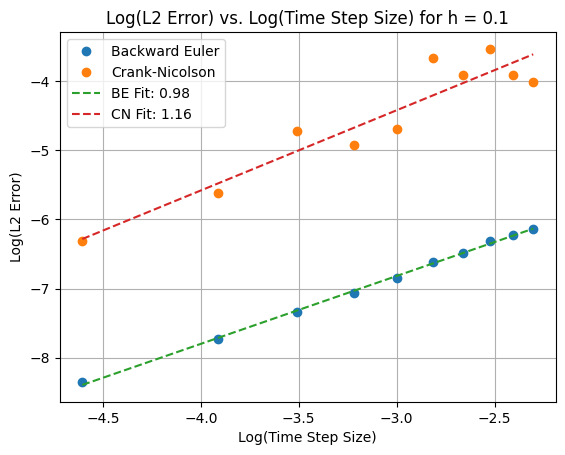

In [ ]:
#2b
from scipy.stats import linregress

max_x = 1
max_t = 1
dx = 0.1
tao = np.arange(0.01, 0.11, 0.01)
errors_CN = []
errors_BE = []
for dt in tao:
  analytical = q2_analytical(max_x, dx, max_t, dt)
  euler = q2_euler(max_x, dx, max_t, dt)
  crank = q2_crank(max_x, dx, max_t, dt)

  # Calculate L2 error for each method
  error_BE = calculate_L2_norm(euler, analytical)
  error_CN = calculate_L2_norm(crank, analytical)
  errors_BE.append(error_BE)
  errors_CN.append(error_CN)

plt.figure()
log_tao = np.log(tao)
log_errors_BE = np.log(errors_BE)
log_errors_CN = np.log(errors_CN)

plt.plot(log_tao, log_errors_BE, marker='o', linestyle='', label='Backward Euler')
plt.plot(log_tao, log_errors_CN, marker='o', linestyle='', label='Crank-Nicolson')

# Perform linear regression to find the slope (order of convergence)
slope_BE, intercept_BE, _, _, _ = linregress(log_tao, log_errors_BE)
slope_CN, intercept_CN, _, _, _ = linregress(log_tao, log_errors_CN)

plt.plot(log_tao, intercept_BE + slope_BE * log_tao, '--', label=f'BE Fit: {slope_BE:.2f}')
plt.plot(log_tao, intercept_CN + slope_CN * log_tao, '--', label=f'CN Fit: {slope_CN:.2f}')

plt.xlabel('Log(Time Step Size)')
plt.ylabel('Log(L2 Error)')
plt.title('Log(L2 Error) vs. Log(Time Step Size) for h = 0.1')
plt.legend()
plt.grid(True)
plt.show()

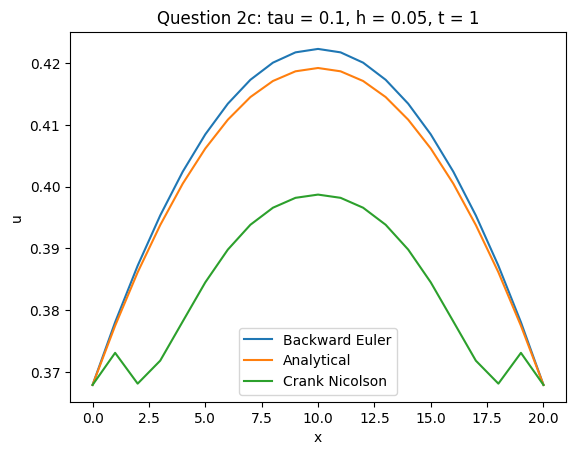

In [ ]:
# Question 2c
max_x = 1
dx = 0.05
max_t = 1
dt = 0.1

analytical = q2_analytical(max_x, dx, max_t, dt)
euler = q2_euler(max_x, dx, max_t, dt)
crank = q2_crank(max_x, dx, max_t, dt)

plt.plot(euler[:,-1], label='Backward Euler')
plt.plot(analytical[:,-1], label='Analytical')
plt.plot(crank[:,-1], label='Crank Nicolson')
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.title('Question 2c: tau = 0.1, h = 0.05, t = 1')
plt.show()

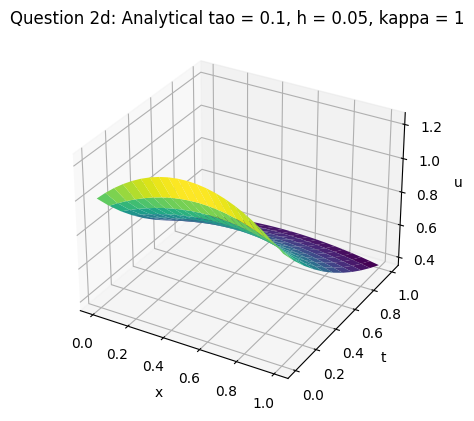

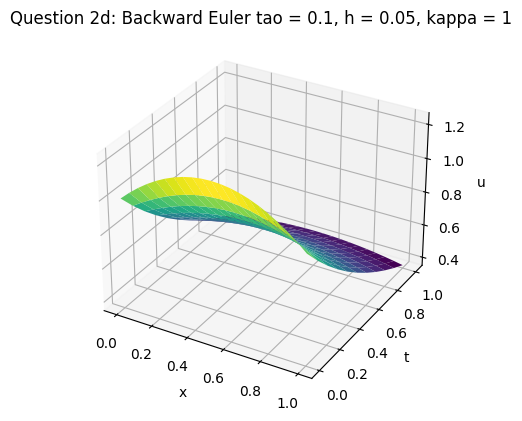

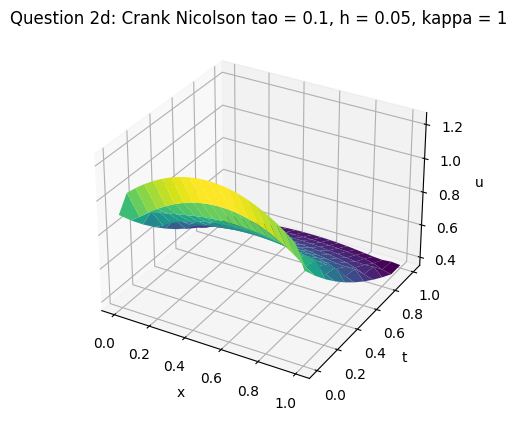

In [ ]:
# Question 2d: Give surface plot of numerical solutions and analytical solution when tao = 0.1, h = 0.05, and k = 1, k = 5
############# Analytical ######################
max_x = 1
max_t = 1
dx = 0.05
dt = 0.1
M = int(max_x / dx)
N = int(max_t / dt)

analytical = q2_analytical(max_x, dx, max_t, dt)
euler = q2_euler(max_x, dx, max_t, dt)
crank = q2_crank(max_x, dx, max_t, dt)

# plot analytical
x = np.linspace(0, max_x, M+1)
t = np.linspace(0, max_t, N+1)
X, T = np.meshgrid(x, t)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title(f'Question 2d: Analytical tao = {dt}, h = {dx}, kappa = 1')
ax.plot_surface(X, T, analytical.T, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
plt.show()

# plot backward euler
x = np.linspace(0, max_x, M+1)
t = np.linspace(0, max_t, N+1)
X, T = np.meshgrid(x, t)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title(f'Question 2d: Backward Euler tao = {dt}, h = {dx}, kappa = 1')
ax.plot_surface(X, T, euler.T, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
plt.show()

# plot crank nicolson
x = np.linspace(0, max_x, M+1)
t = np.linspace(0, max_t, N+1)
X, T = np.meshgrid(x, t)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T, crank.T, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
ax.set_title(f'Question 2d: Crank Nicolson tao = {dt}, h = {dx}, kappa = 1')
plt.show()

In [ ]:
# Question 2e
tau = np.array([1/20, 1/40, 1/80, 1/160, 1/320])
h = np.array([1/40, 1/80, 1/160, 1/320, 1/640])
max_x = 1
max_t = 1
errors_CN = []
errors_BE = []
analytical_values = []
euler_values = []
crank_values = []

for i in range(len(tau)):
    dt = tau[i]
    dx = h[i]

    analytical = q2_analytical(max_x, dx, max_t, dt)
    euler = q2_euler(max_x, dx, max_t, dt)
    crank = q2_crank(max_x, dx, max_t, dt)


    # Calculate L2 error for each method
    error_BE = calculate_L2_norm(euler, analytical)
    error_CN = calculate_L2_norm(crank, analytical)
    errors_BE.append(error_BE)
    errors_CN.append(error_CN)

ROC_euler = []
ROC_crank = []
for i in range(1, len(errors_BE)):
    ROC_euler.append(np.log2(errors_BE[i-1] / errors_BE[i]))
    ROC_crank.append(np.log2(errors_CN[i-1] / errors_CN[i]))
print(f'h            tau                     Backward-Euler               Crank-Nicolson')
print(f'====================================================================================')
print(f'                                 L2 error        ROC            L2 error       ROC')
print(f'------------------------------------------------------------------------------------')
print(f'{h[0]:.2e}    {tau[0]:.2e}             {errors_BE[0]:.2e}          -            {errors_CN[0]:.2e}          -')
print(f'{h[1]:.2e}    {tau[1]:.2e}             {errors_BE[1]:.2e}      {ROC_euler[0]:.2e}         {errors_CN[1]:.2e}      {ROC_crank[0]:.2e}')
print(f'{h[2]:.2e}    {tau[2]:.2e}             {errors_BE[2]:.2e}      {ROC_euler[1]:.2e}         {errors_CN[2]:.2e}      {ROC_crank[1]:.2e}')
print(f'{h[3]:.2e}    {tau[3]:.2e}             {errors_BE[3]:.2e}      {ROC_euler[2]:.2e}         {errors_CN[3]:.2e}      {ROC_crank[2]:.2e}')
print(f'{h[4]:.2e}    {tau[4]:.2e}             {errors_BE[4]:.2e}      {ROC_euler[3]:.2e}         {errors_CN[4]:.2e}      {ROC_crank[3]:.2e}')

h            tau                     Backward-Euler               Crank-Nicolson
                                 L2 error        ROC            L2 error       ROC
------------------------------------------------------------------------------------
2.50e-02    5.00e-02             1.07e-03          -            9.73e-03          -
1.25e-02    2.50e-02             5.30e-04      1.01e+00         4.95e-03      9.76e-01
6.25e-03    1.25e-02             2.64e-04      1.01e+00         2.49e-03      9.89e-01
3.13e-03    6.25e-03             1.32e-04      9.97e-01         1.25e-03      9.95e-01
1.56e-03    3.13e-03             6.72e-05      9.77e-01         6.26e-04      9.99e-01
